![](https://i.imgur.com/La3jjO4.png)

Copyright &copy; 2019 COTAI. All rights reserved.

# Tabular Approaches for Tabular Environments

For this tutorial we are going to be attempting to solve the `FrozenLake` environment from the `OpenAI gym`

![alt text](https://miro.medium.com/max/884/1*MCjDzR-wfMMkS0rPqXSmKw.png)

Task: Move from cell `S` to cell `G`

Possible actions:
- Up
- Down
- Left
- Right

Reward:
- Enter cell G: 1
- Otherwise: 0

Thus, we will need an algorithm that learns long-term expected rewards. This is exactly what Q-Learning is designed to provide.

In it’s simplest implementation, Q-Learning is a table of values for every state (row) and action (column) possible in the environment. Within each cell of the table, we learn a value for how good it is to take a given action within a given state. In the case of the FrozenLake environment, we have 16 possible states (one for each block), and 4 possible actions (the four directions of movement), giving us a **16x4** table of Q-values. 

### Q-values table

|State(cell)|Left|Down|Right|Up|
|---|---|---|---|---|
|00 | 0 | 0 | 0 | 0 |
|01 | 0 | 0 | 0 | 0 |
|...| 0 | 0 | 0 | 0 |
|33 | 0 | 0 | 0 | 0 |

We start by initializing the table to be uniform (all zeros), and then as we observe the rewards we obtain for various actions, we update the table accordingly.

Updating Algorithm: Bellman Equation

$$
Q(s,a) = r + \gamma(max(Q(s',a')))
$$

This says that the Q-value for a given state ($s$) and action ($a$) should represent the **current reward** ($r$) plus the maximum discounted ($\gamma$) future reward expected according to our own table for the next state ($s’$) we would end up in. The discount variable allows us to decide how important the possible future rewards are compared to the present reward. By updating in this way, the table slowly begins to obtain accurate measures of the expected future reward for a given action in a given state

$$
\hat{V} = Q(s,a)
$$
$$
V = r + \gamma(max(Q(s',a')))
$$
$$
\nabla{Q(s,a)} = \hat{V} - V = Q(s,a) - (r + \gamma*max(Q)(s',a')))
$$

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
Score over time:  0.57704
Final Q-Table Values
[[0.03369014 0.00194354 0.00183838 0.00275108]
 [0.00066751 0.00002741 0.00018566 0.13460812]
 [0.00075622 0.0682191  0.00045556 0.00086566]
 [0.00001498 0.00007249 0.00044791 0.07792629]
 [0.04224355 0.00013859 0.00209243 0.00063792]
 [0.         0.         0.         0.        ]
 [0.00001038 0.         0.05238999 0.00000832]
 [0.         0.         0.         0.        ]
 [0.00222427 0.00014441 0.00059702 0.10724548]
 [0.         0.20875521 0.00046268 0.00073713]
 [0.05428505 0.00001823 0.         0.0000291 ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.00029791 0.00050894 0.37525166 0.0020852 ]
 [0.    

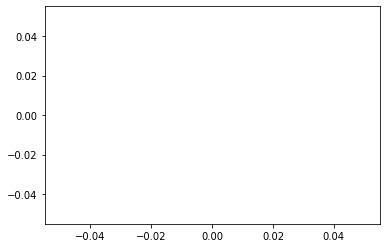

In [0]:
import gym
import numpy as np
import os

np.set_printoptions(suppress=True)

# Load the environment
env = gym.make('FrozenLake-v0')

# ------------------------------------
# Implement Q-Table learning algorithm
# ------------------------------------

#Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])

# Set learning parameters
eta = 0.8
gamma = 0.95
num_episodes = 50000



#create lists to contain total rewards and steps per episode
#jList = []
rList = []
for i in range(num_episodes):
    if i%1000==0:
      print(i)
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    done = False
    j = 0
    #The Q-Table learning algorithm
    for j in range(1000):

        #Choose an action by greedily (with noise) picking from Q table
        noise = np.random.randn(1,env.action_space.n)*(1./(i+1))
        a = np.argmax(Q[s,:] + noise)
        # a = np.argmax(Q[s,:])

        #Get new state and reward from environment
        # print('------------------------')
        # env.render()
        s1,r,done,_ = env.step(a)
        # print(a)
        # env.render()
        
        #Update Q-Table with new knowledge
        # TODO: implement code here
        # --------------------------------
        # 
        V = r + gamma*np.max(Q[s1,:])
        V_hat = Q[s,a]
        Q_grad = V_hat - V
        Q[s,a] = Q[s,a] - eta*Q_grad
        rAll += r
        # print(Q)
        
        s = s1
        if done:
            break
    #jList.append(j)
    rList.append(rAll)

import matplotlib.pyplot as plt
plt.plot(rAll)
print("Score over time: ",  str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print(Q)